In [ ]:
# Напишите нейросеть для распознавания предметов на цветных фотографиях

from tensorflow.keras.datasets import cifar10 # Загружаем базу cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # Базовые слои для счёрточных сетей
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils # Используем для One Hot Encoding
from tensorflow.keras.preprocessing import image # Для отрисовки изображений
from google.colab import files # Для работы с файлами
import numpy as np # Библиотека работы с массивами

import matplotlib.pyplot as plt # Для отрисовки графиков
from PIL import Image # Для работы с изображениями
import random # Для генерации случайных чисел 
import math # Для округления
import os # Для работы с функциями операционной системы
from google.colab import drive # Для работы с Google Drive

%matplotlib inline

In [ ]:
# Загружаем базу изображений с правильными ответами Cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print("Размер обучающей выборки")
print(x_train.shape, '\n')

print("Размер тестовой выборки")
print(x_test.shape)

Размер обучающей выборки
(50000, 32, 32, 3) 

Размер тестовой выборки
(10000, 32, 32, 3)


In [ ]:
# Определяем названия классов изображений в зависимости от лэйбла
labels = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

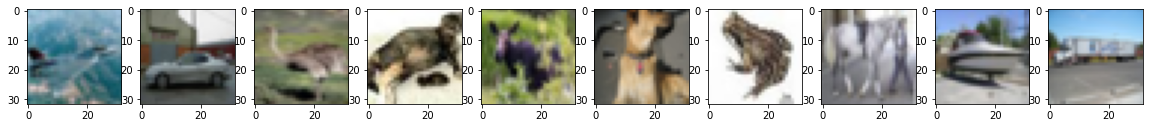

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [ ]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train[index][0]
  y += str(label) + "("+labels[label]+"); " # Сохраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображения

# Отображаем картинки и соответствующие картинкам лэйблы
plt.show()
print("Правильные ответы:", y)

In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
print(y_test.shape)

print("Обучающая выборка:")
print(y_train[5], "->", y_train[5])
print(y_train[234], "->", y_train[234])
print(y_train[69], "->", y_train[69])
print(y_train[14848], "->", y_train[14848])
print()

print("Тестовая выборка:")
print(y_train[15], "->", y_train[15])
print(y_train[334], "->", y_train[334])
print(y_train[8477], "->", y_train[8477])
print(y_train[3768], "->", y_train[3768])


(10000, 10)
Обучающая выборка:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] -> [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Тестовая выборка:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Преобразуем нашу картинку в последовательность цифр (выравнивание)

x_train = x_train.reshape(x_train.shape[0], 32*32*3) # Т.к. в используемом датасете иозображения в формате 32 на 32 пикселя на 3 цвета, то при выравнивании указываем те же параметры
x_test = x_test.reshape(x_test.shape[0], 32*32*3) # 

print("Размерность x_train: ", x_train.shape)
print("Размерность x_test: ", x_test.shape)

Размерность x_train:  (50000, 3072)
Размерность x_test:  (10000, 3072)


In [ ]:
# Нормализация картинок:

print("Изначальные значения:")
print(x_train[10][120:135])
print()

x_train = x_train / 255
x_test = x_test / 255

print("Значения после нормализации:")
print(x_train[10][120:135])

Изначальные значения:
[65 73 59 74 81 66 77 81 67 83 83 71 83 81 65]

Значения после нормализации:
[0.25490196 0.28627451 0.23137255 0.29019608 0.31764706 0.25882353
 0.30196078 0.31764706 0.2627451  0.3254902  0.3254902  0.27843137
 0.3254902  0.31764706 0.25490196]


In [ ]:
# Задаём batch_size # После работы с каким кол. изображений веса изменятся
batch_size = 512 

# Создаем последовательную модель нейронной сети
model = Sequential()
# Выравнивающий слой
model.add(Dense(3000, input_dim=3072, activation='relu')) # input_dim= количество входных нейронов
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Полносвязные скрытые слой
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

# Слой классификации
model.add(Dense(10, activation='softmax'))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3000)              9219000   
_________________________________________________________________
batch_normalization_3 (Batch (None, 3000)              12000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1536512   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

In [ ]:
# Обучаем нейросеть

#Обучаем сеть на данных cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
79/79 [==============================] - 3s 30ms/step - loss: 1.7839 - accuracy: 0.3756 - val_loss: 2.6651 - val_accuracy: 0.2487
Epoch 2/10
79/79 [==============================] - 2s 24ms/step - loss: 1.5672 - accuracy: 0.4442 - val_loss: 1.8185 - val_accuracy: 0.3736
Epoch 3/10
79/79 [==============================] - 2s 25ms/step - loss: 1.4875 - accuracy: 0.4697 - val_loss: 1.6574 - val_accuracy: 0.4122
Epoch 4/10
79/79 [==============================] - 2s 25ms/step - loss: 1.4298 - accuracy: 0.4952 - val_loss: 1.7159 - val_accuracy: 0.3787
Epoch 5/10
79/79 [==============================] - 2s 25ms/step - loss: 1.3809 - accuracy: 0.5102 - val_loss: 1.9881 - val_accuracy: 0.3465
Epoch 6/10
79/79 [==============================] - 2s 24ms/step - loss: 1.3456 - accuracy: 0.5210 - val_loss: 1.9549 - val_accuracy: 0.3381
Epoch 7/10
79/79 [==============================] - 2s 25ms/step - loss: 1.2956 - accuracy: 0.5412 - val_loss: 2.0017 - val_accuracy: 0.3304
Epoch 8/10
79

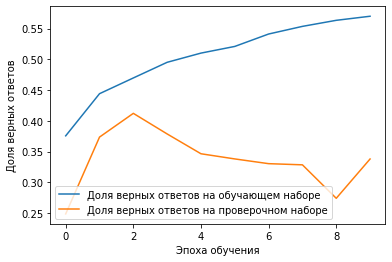

In [ ]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Запись результатов предикта в таблицу.

In [ ]:
# С момощью пакетного менеджера pip устанавливаем нужную библиотеку
!pip install pymysql

# Подключаем библиотеки для работы с MySQL из Python
import pymysql
from pymysql.cursors import DictCursor

In [ ]:
# Соединяемся с базой данных #dbh - db handler - соединитель с бд
dbh = pymysql.connect(
        host='db-learning.ithub.ru',
        user='2p1s10',
        password='404-086-366',
        db='2p1s10',
        charset='utf8mb4',
        cursorclass=DictCursor
    )

Подаём в нейросеть все картинки из тестовой выборки

In [ ]:
# print("Количество тестовых данных (x_test) для занесения в БД: ", x_test.shape[0])

# # Подаем в нейросеть все картинки из тестовой выборки
# prediction = model.predict(x_test)

# print("Выход сети: ")

# for n in range(x_test.shape[0]): # Идём по изображениям тестовой выборки
#   for i in range(10): # Идём по вероятностям, чем является это изображение # 10 - кол. возможных ответов
#     print(i,"->","{:.10f}".format(prediction[n][i]))

#   # Без labels. Получаю цифру соответствующую верному ответу.
#   print("Распознано: ", np.argmax(prediction[n]) )
#   print("Верный ответ: ", np.argmax(y_test[n]) )

#   print()
#   break

# # dbh.commit()

In [ ]:
def insertDB(dbh, pred, n, ans, cor_ans): # dbh, + остальные значения # Вставка через f строки
  try:
    # for
    with dbh.cursor() as cur:
      sql = f"INSERT INTO cp4_prediction \
      (prediction0, prediction1, prediction2, prediction3, \
      prediction4, prediction5, prediction6, prediction7, \
      prediction8, prediction9, answer, correct_answer) \
      VALUES ({pred[n][0]}, {pred[n][1]}, {pred[n][2]}, {pred[n][3]}, \
      {pred[n][4]}, {pred[n][5]}, {pred[n][6]}, {pred[n][7]}, \
      {pred[n][8]}, {pred[n][9]}, {ans}, {cor_ans});"
      print(sql)
      cur.execute(sql)
  except:
    print("Что-то пошло не так")


In [ ]:
print("Количество тестовых данных (x_test) для занесения в БД: ", x_test.shape[0])
# Подаем в нейросеть все картинки из тестовой выборки
pred = model.predict(x_test) # pred = prediction

print("Выход сети: ")

# Идём по изображениям тестовой выборки
for n in range(x_test.shape[0]):

  # Без labels. Получаю цифру соответствующую верному ответу.
  ans = np.argmax(prediction[n]) # Результат распознования изображения
  cor_ans = np.argmax(y_test[n]) # Верный ответ

  insertDB(dbh, pred, n, ans, cor_ans)
  dbh.commit()

  print()

Streaming output truncated to the last 5000 lines.
INSERT INTO cp4_prediction       (prediction0, prediction1, prediction2, prediction3,       prediction4, prediction5, prediction6, prediction7,       prediction8, prediction9, answer, correct_answer)       VALUES (0.011254680342972279, 0.03044804185628891, 0.009230312891304493, 0.3041093051433563,       0.005161577835679054, 0.3677813708782196, 0.03642888367176056, 0.22599981725215912,       0.0002231062826467678, 0.009362881071865559, 5, 6);

INSERT INTO cp4_prediction       (prediction0, prediction1, prediction2, prediction3,       prediction4, prediction5, prediction6, prediction7,       prediction8, prediction9, answer, correct_answer)       VALUES (0.014428557828068733, 0.658294141292572, 0.002028074348345399, 0.006903951056301594,       0.0490850992500782, 0.009698266163468361, 0.0026721672620624304, 0.058080125600099564,       0.006098130252212286, 0.19271153211593628, 1, 9);

INSERT INTO cp4_prediction       (prediction0, predi